<a href="https://colab.research.google.com/github/lcipolina/ML_Fundamentals/blob/main/Ex2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 2

Generate a data Frame with the given data


In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:

lst = [22.7,
       16.3,
       13.6,
       16.8,
       29.9,
       15.9,
       14,15,
       14.1,
       18.1,
       22.8,
       27.6,
       16.4,
       16.1,
       19,
       13.5,
       18.9,
       20.2,
       19.7,
       18.2,
       15.4,
       15.7,
       19,
       11.5,
       18.4,
       16,
       16.9,
       12,
       40.1,
       19.2]

# initialise data of lists.
data = {'data':pd.Series(lst)}
df = pd.DataFrame(data)
df.head()

,data
0,22.7
1,16.3
2,13.6
3,16.8
4,29.9


Calculate Mean and Variance

In [33]:
mean = df.mean(axis =0)
stdev = df.std(axis=0)
print('mean:', mean)
print('std_dev:',stdev)

mean: data    18.433333
dtype: float64
std_dev: data    5.765853
dtype: float64


Plot a histogram of the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7103c48790>]],
      dtype=object)

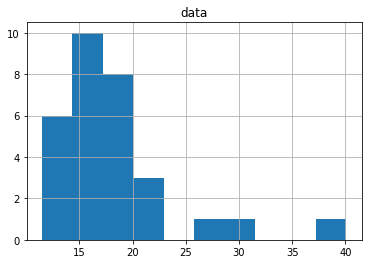

In [34]:
df.hist()

Compute the mean of the data and a 95% confidence interval, assuming normal distribution.

In [49]:
q = stdev/np.sqrt(len(lst))
upper = mean+1.96*q
lower = mean-1.96*q

print('lower bound:', lower)
print('upper bound:',upper)

lower bound: data    16.370049
dtype: float64
upper bound: data    20.496617
dtype: float64


From the given observations, draw 1000 new samples, each of size 30. 

The samples are drawn uniformly, and with replacement. 

Compute the mean from each of the new samples.

 Call the mean x∗. Therefore, you have 1000 such means x∗1, x∗2 . . . x∗1000.